---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 16.3 Runge-Kutta methods
---

We now consider higher-order numerical methods for solving the **initial value ODE problem**:

$$ \frac{dy}{dt} = f(t, y), \quad a \leq t \leq b, \quad y(a) = c. $$

We approximate the function $y(t)$ that solves this ODE at evenly spaced points $a = t_0 < t_1 < \cdots < t_N = b$, where 

$$h = \frac{b - a}{N}, \quad t_i = a + ih, \quad i = 0, 1, \ldots, N.$$

Thus, we will compute $y_i$ such that $y_i \approx y(t_i)$, for all $i$.

---

Recall that both the _explicit_ **forward Euler** method,

$$ 
\begin{align}
y_0 &= c,\\
y_{i+1} &= y_i + hf(t_i, y_i), \quad i = 0, 1, \ldots, N-1,
\end{align}
$$

and the _implicit_ **backward Euler** method,

$$ 
\begin{align}
y_0 &= c,\\
y_{i+1} &= y_i + hf(t_{i+1}, y_{i+1}), \quad i = 0, 1, \ldots, N-1,
\end{align}
$$

are **first order accurate** since the _local truncation error_ $d_i$ at each step is $\mathcal{O}(h)$ and the _global error_ is also $\mathcal{O}(h)$:

$$ \abs{e_i} = \abs{y(t_i) - y_i} = \mathcal{O}(h), \quad i = 0, 1, \ldots, N.$$

We will now see some $\mathcal{O}(h^2)$ Runge-Kutta methods, and the celebrated $\mathcal{O}(h^4)$ Runge-Kutta method:  **`RK4`**.

---

## Runge-Kutta trapezoidal methods

First we observe that 

$$\int_{t_i}^{t_{i+1}} f(t, y(t))\,dt = \int_{t_i}^{t_{i+1}} y'(t)\,dt = y(t_{i+1}) - y(t_i).$$

Therefore, we have

$$ y(t_{i+1}) = y(t_i) + \int_{t_i}^{t_{i+1}} f(t, y(t))\,dt.$$

The **trapezoidal rule** can be used to approximate the integral:

$$\int_{t_i}^{t_{i+1}} f(t, y(t))\,dt = \frac{h}{2}\brack{f(t_i,y(t_i)) + f(t_{i+1},y(t_{i+1}))} + \mathcal{O}(h^3).$$

Thus, we have

$$ y(t_{i+1}) = y(t_i) + \frac{h}{2}\brack{f(t_i,y(t_i)) + f(t_{i+1},y(t_{i+1}))} + \mathcal{O}(h^3).$$

Recall that the **local truncation error**, $d_i$, is the amount by which the exact solution $y(t)$ fails to satisfy the difference equation, written in divided difference form, at integration step $i$.

Thus, we have that

$$d_i = \frac{y(t_{i+1}) - y(t_i)}{h} - \frac{1}{2}\brack{f(t_i,y(t_i)) + f(t_{i+1},y(t_{i+1}))} = \mathcal{O}(h^2).$$

### An implicit trapezoidal method

Given an approximation $y_i$ for $y(t_i)$, we can define an approximation $y_{i+1}$ for $y(t_{i+1})$ **implicitly** by:

$$ y_{i+1} = y_i + \frac{h}{2}\brack{f(t_i,y_i) + f(t_{i+1},y_{i+1})}.$$

By the above, this implicit method is **second order accurate**.

### An explicit trapezoidal method

To obtain an **explicit** method, we can replace $y_{i+1}$ by the forward Euler approximation $y_i + h f(t_i,y_i):$

$$
K_1 = f(t_i,y_i)
$$

$$
K_2 = f(t_{i+1}, y_i + hK_1)
$$

$$
y_{i+1} = y_i + \frac{h}{2}\brack{K_1 + K_2}
$$

We will see that this explicit method is **second order accurate**.

---

## An implementation of the RK Explicit Trapezoidal method

In [1]:
function rktrap(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        K1 = f(tt[i], yy[i])
        K2 = f(tt[i+1], yy[i] + h*K1)
        K  = (K1 + K2)/2
        yy[i+1] = yy[i] + h*K
    end
    
    return tt, yy
end

rktrap (generic function with 1 method)

We can similarly implement Euler's method.

In [2]:
function euler(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        K1 = f(tt[i], yy[i])
        yy[i+1] = yy[i] + h*K1
    end
    
    return tt, yy
end

euler (generic function with 1 method)

---

## Example

Consider the ODE

$$\frac{dy}{dt} = -5y + 5t^2 + 2t, \quad 0 \leq t \leq 1, \quad y(0) = 1.$$

The exact solution to this ODE is

$$y(t) = t^2 + e^{-5t}.$$


In [3]:
#####################################################
# Define the ODE and the true solution
f(t, y) = -5y + 5t^2 + 2t
a, b, y0 = 0, 1, 1
ytrue(t) = t.^2 + exp.(-5t)

ytrue (generic function with 1 method)

In [4]:
using Printf

@printf "%6s %8s %14s %14s\n" "N" "h" "euler error" "rktrap error"
for k = 0:4
    N = 10^k
    h = (b - a)/N

    tt, yy1 = euler(f, a, b, y0, N)
    abserr1 = abs.(yy1 - ytrue(tt))
    
    tt, yy2 = rktrap(f, a, b, y0, N)
    abserr2 = abs.(yy2 - ytrue(tt))

    @printf("%6d %8.0e %14.2e %14.2e\n", N, h,
        maximum(abserr1), maximum(abserr2))
end

     N        h    euler error   rktrap error
     1    1e+00       5.01e+00       1.10e+01
    10    1e-01       1.33e-01       2.68e-02
   100    1e-02       1.07e-02       1.93e-04
  1000    1e-03       1.05e-03       1.87e-06
 10000    1e-04       1.05e-04       1.86e-08


In [5]:
tt1, yy1 = euler(f, a, b, y0, 20000)  # f(t,y) called 20000 times
tt2, yy2 = rktrap(f, a, b, y0, 10000) # f(t,y) called 20000 times

maximum(abs.(yy1 - ytrue(tt1))), maximum(abs.(yy2 - ytrue(tt2)))

(5.2454446081207085e-5, 1.860154380528556e-8)

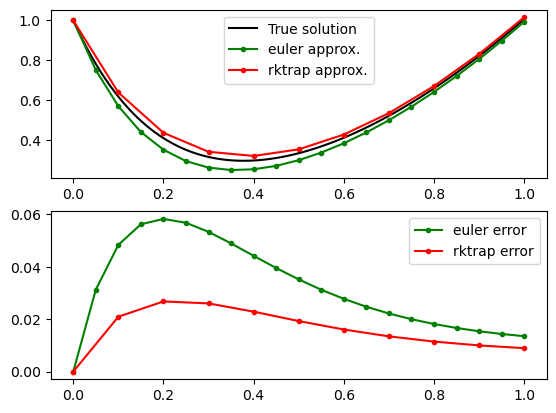

In [6]:
using PyPlot

N = 10

tt = range(a, b, length=100)

tt1, yy1 = euler(f, a, b, y0, 2*N)  # f(t,y) called 2N times
tt2, yy2 = rktrap(f, a, b, y0, N)   # f(t,y) called 2N times
abserr1 = abs.(yy1 - ytrue(tt1))
abserr2 = abs.(yy2 - ytrue(tt2))

subplot(2, 1, 1)
plot(tt, ytrue(tt), "k", label="True solution")
plot(tt1, yy1, ".-g", label="euler approx.")
plot(tt2, yy2, ".-r", label="rktrap approx.")
legend(loc="best")

subplot(2, 1, 2)
plot(tt1, abserr1, ".-g", label="euler error")
plot(tt2, abserr2, ".-r", label="rktrap error")
legend(loc="best");

So even when both Euler's method and the RK Explicit Trapezoidal method are evaluating $f(t,y)$ the same number of times, the RK method is clearly more accurate.

---

## RK explicit trapezoidal method is second order accurate

Recall that the RK explicit trapezoidal method is given by:

$$
K_1 = f(t_i,y_i)
$$

$$
K_2 = f(t_{i+1}, y_i + hK_1)
$$

$$
y_{i+1} = y_i + \frac{h}{2}\brack{K_1 + K_2}
$$

As a single equation, we have

$$
y_{i+1} = y_i + \frac{h}{2} \brack{ f(t_i, y_i) + f(t_{i+1}, y_i + h f(t_i, y_i)) }.
$$


Therefore, the truncation error is given by

$$
d_i = 
\frac{y(t_{i+1}) - y(t_i)}{h} - \frac12\brack{ f(t_i, y(t_i)) + f(t_{i+1}, y(t_i) + h f(t_i, y(t_i)))}.
$$

We will show that $d_i = \mathcal{O}(h^2)$.

First, we will need the following Taylor expansion of $y(t)$:

$$
y(t_{i+1}) = y(t_i) + h y'(t_i) + \frac{h^2}{2} y''(t_i) + \mathcal{O}(h^3)
$$

Thus,

$$
\frac{y(t_{i+1}) - y(t_i)}{h} =  y'(t_i) + \frac{h}{2} y''(t_i) + \mathcal{O}(h^2).
$$

By the **Chain rule**, $y'(t) = f(t,y)$ implies that

\begin{align}
y''(t) = \frac{d}{dt} f(t,y)
&= \frac{\partial f}{\partial t} \frac{dt}{dt} + \frac{\partial f}{\partial y} \frac{dy}{dt} \\
&= \frac{\partial f}{\partial t} + \frac{\partial f}{\partial y} y'(t).
\end{align}

We will also need the **Multivariable Taylor Expansion** which states that if $f \colon \mathbb{R}^2 \to \mathbb{R}$ is differentiable, then

$$ f(\mathbf{x} + \mathbf{p}) = f(\mathbf{x}) + \nabla f(\mathbf{x})^T \mathbf{p} + \mathcal{O}(\norm{\mathbf{p}}^2),$$

where $\nabla f(\mathbf{x})$ is the **gradient of $f$**:

$$
\nabla f(\mathbf{x}) = 
\begin{bmatrix} 
\frac{\partial f(\mathbf{x})}{\partial x_1} \\
\frac{\partial f(\mathbf{x})}{\partial x_2}
\end{bmatrix}.
$$

Thus, we have that

$$f(t + ah, y + bh) = f(t,y) + \frac{\partial f(t,y)}{\partial t}ah + \frac{\partial f(t,y)}{\partial y}bh + \mathcal{O}(h^2).$$

In particular,

$$
\begin{split}
f\paren{t_{i+1}, y(t_i) + h f(t_i, y(t_i))} 
& = f\paren{t_i + h, y(t_i) + h y'(t_i)} \\
& = f(t_i, y(t_i)) + \frac{\partial f(t_i, y(t_i))}{\partial t} h + \frac{\partial f(t_i, y(t_i))}{\partial y} h y'(t_i) + \mathcal{O}(h^2)\\
& = y'(t_i) + y''(t_i) h + \mathcal{O}(h^2).\\
\end{split}
$$

Okay, let's put this all together:

$$
\begin{split}
d_i 
& = \frac{y(t_{i+1}) - y(t_i)}{h} - \frac12\brack{ f(t_i, y(t_i)) + f\paren{t_{i+1}, y(t_i) + h f(t_i, y(t_i))}} \\
& = y'(t_i) + \frac{h}{2} y''(t_i) - \frac12\brack{ y'(t_i) + y'(t_i) + y''(t_i) h} + \mathcal{O}(h^2) \\
& = 0 + \mathcal{O}(h^2)\\
& = \mathcal{O}(h^2).
\end{split}
$$

Therefore, we have that

$$
\max_i \abs{d_i} = \mathcal{O}(h^2),
$$

so the **RK explicit trapezoidal** method is **second order accurate**.



---

## Runge-Kutta midpoint methods

Recall that

$$ y(t_{i+1}) = y(t_i) + \int_{t_i}^{t_{i+1}} f(t, y(t))\,dt.$$

We now approximate the integral using the **midpoint rule**:

$$\int_{t_i}^{t_{i+1}} f(t, y(t))\,dt = 
h f(t_{i+1/2},y(t_{i+1/2})) + \mathcal{O}(h^3),
$$

where $t_{i+1/2} = t_i + h/2$.

Thus, we have

$$ y(t_{i+1}) = y(t_i) + h f(t_{i+1/2},y(t_{i+1/2})) + \mathcal{O}(h^3).$$

In this case, the **local truncation error** is given by

$$d_i = \frac{y(t_{i+1}) - y(t_i)}{h} - f(t_{i+1/2},y(t_{i+1/2})) = \mathcal{O}(h^2).$$

### An implicit midpoint method

Given an approximation $y_i$ for $y(t_i)$, we can define an approximation $y_{i+1}$ for $y(t_{i+1})$ **implicitly** by:

$$ y_{i+1} = y_i + h f(t_{i+1/2},y_{i+1/2}),$$

where 

$$y_{i+1/2} = \frac{y_i + y_{i+1}}{2}.$$

This implicit method is **second order accurate**.

### An explicit midpoint method

To obtain an **explicit** method, we can replace $y_{i+1/2}$ by the forward Euler approximation $y_i + \frac{h}{2} f(t_i,y_i):$

$$
K_1 = f(t_i,y_i)
$$

$$
K_2 = f\paren{t_{i+1/2}, y_i + \frac{h}{2}K_1}
$$

$$
y_{i+1} = y_i + hK_2
$$

This explicit method is also **second order accurate**.

---

## An implementation of the RK Explicit Midpoint method

In [7]:
function rkmidpoint(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        K1 = f(tt[i], yy[i])
        K2 = f(tt[i] + h/2, yy[i] + h/2*K1)
        yy[i+1] = yy[i] + h*K2
    end
    
    return tt, yy  
end

rkmidpoint (generic function with 1 method)

---

## Example

Recall our example ODE

$$\frac{dy}{dt} = -5y + 5t^2 + 2t, \quad 0 \leq t \leq 1, \quad y(0) = 1,$$

which has an exact solution of

$$y(t) = t^2 + e^{-5t}.$$


In [8]:
#####################################################
# Define the ODE and the true solution
f(t, y) = -5y + 5t^2 + 2t
a, b, y0 = 0, 1, 1
ytrue(t) = t.^2 + exp.(-5t)

ytrue (generic function with 1 method)

In [9]:
@printf("%6s %8s %12s %12s %12s\n", "N", "h", 
    "euler", "rktrap", "rkmidpoint")
for k = 0:4
    N = 10^k
    h = (b - a)/N

    tt, yy1 = euler(f, a, b, y0, N)
    abserr1 = abs.(yy1 - ytrue(tt))
    
    tt, yy2 = rktrap(f, a, b, y0, N)
    abserr2 = abs.(yy2 - ytrue(tt))

    tt, yy3 = rkmidpoint(f, a, b, y0, N)
    abserr3 = abs.(yy3 - ytrue(tt))

    @printf("%6d %8.0e %12.2e %12.2e %12.2e\n", N, h, 
        maximum(abserr1), maximum(abserr2), maximum(abserr3) )
end

     N        h        euler       rktrap   rkmidpoint
     1    1e+00     5.01e+00     1.10e+01     9.74e+00
    10    1e-01     1.33e-01     2.68e-02     2.48e-02
   100    1e-02     1.07e-02     1.93e-04     1.76e-04
  1000    1e-03     1.05e-03     1.87e-06     1.70e-06
 10000    1e-04     1.05e-04     1.86e-08     1.69e-08


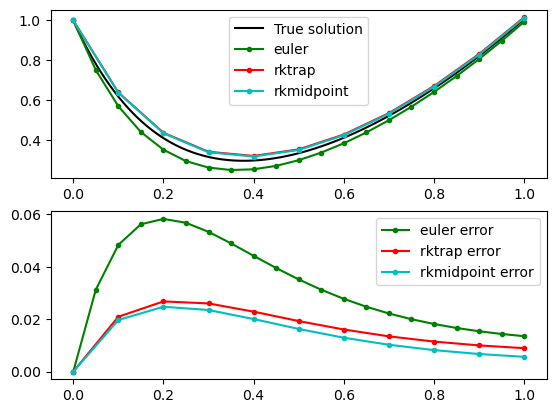

In [10]:
using PyPlot

N = 10

tt = range(a, b, length=100)

# each method calls f(t,y) 2N times
tt1, yy1 = euler(f, a, b, y0, 2*N)
tt2, yy2 = rktrap(f, a, b, y0, N)
tt3, yy3 = rkmidpoint(f, a, b, y0, N)
abserr1 = abs.(yy1 - ytrue(tt1))
abserr2 = abs.(yy2 - ytrue(tt2))
abserr3 = abs.(yy3 - ytrue(tt3))

subplot(2, 1, 1)
plot(tt, ytrue(tt), "k", label="True solution")
plot(tt1, yy1, ".-g", label="euler")
plot(tt2, yy2, ".-r", label="rktrap")
plot(tt3, yy3, ".-c", label="rkmidpoint")
legend(loc="best")

subplot(2, 1, 2)
plot(tt1, abserr1, ".-g", label="euler error")
plot(tt2, abserr2, ".-r", label="rktrap error")
plot(tt3, abserr3, ".-c", label="rkmidpoint error")
legend(loc="best");

---

## General explicit Runge-Kutta methods

Euler's method can be thought of as a **$1$-stage explicit RK method**.

- **Euler's method**:

    $$ K_1 = f(t_i, y_i) $$
    
    $$ y_{i+1} = y_i + h K_1 $$

We also have the following **$2$-stage explicit RK methods**.

- **RK explicit trapezoidal method**:

    $$ K_1 = f(t_i,y_i) $$

    $$ K_2 = f(t_i + h, y_i + hK_1) $$

    $$ y_{i+1} = y_i + \frac{h}{2}\brack{K_1 + K_2} $$

- **RK explicit midpoint method**:

    $$ K_1 = f(t_i,y_i) $$

    $$ K_2 = f\paren{t_i + \frac{h}{2}, y_i + \frac{h}{2}K_1} $$

    $$ y_{i+1} = y_i + hK_2 $$


We can generalize these to an **explicit $s$-stage RK method**:

$$ K_1 = f(t_i, y_i) $$

$$ K_2 = f\paren{t_i + h c_2, y_i + h a_{21} K_1} $$

$$ K_3 = f\paren{t_i + h c_3, y_i + h \paren{a_{31} K_1 + a_{32} K_2} }$$

$$ \vdots $$

$$ K_s = f\paren{t_i + h c_s, y_i + h \paren{a_{s1} K_1 + \cdots + a_{s,s-1} K_{s-1}} }$$

$$ y_{i+1} = y_i + h \paren{b_1 K_1 + \cdots + b_s K_s} $$

where

$$c_j = \sum_{k=1}^{j-1} a_{jk}, \quad \sum_{k=1}^s b_k = 1.$$

The $a$, $b$, and $c$ terms can be organized in a **Butcher tableau**:

$$
\begin{array}{c|cccc}
0 & \\
c_2 & a_{21} \\
c_3 & a_{31} & a_{32} \\
\vdots & \vdots & \vdots & \ddots \\
c_s & a_{s1} & a_{s2} & \cdots & a_{s,s-1} \\
\hline
& b_1 & b_2 & \cdots & b_{s-1} & b_s
\end{array}
$$

### Examples

**Euler's method**

$$ K_1 = f(t_i, y_i) $$

$$ y_{i+1} = y_i + h K_1 $$

has the tableau:

$$
\begin{array}{c|cccc}
0 & \\
\hline
& 1
\end{array}
$$

The **RK explicit trapezoidal method**

$$ K_1 = f(t_i,y_i) $$

$$ K_2 = f(t_i + h, y_i + hK_1) $$

$$ y_{i+1} = y_i + \frac{h}{2}\brack{K_1 + K_2} $$
    
has the tableau:

$$
\begin{array}{c|cccc}
0 & \\
1 & 1 \\
\hline
& 1/2 & 1/2 
\end{array}
$$

The **RK explicit midpoint method**:

$$ K_1 = f(t_i,y_i) $$

$$ K_2 = f\paren{t_i + \frac{h}{2}, y_i + \frac{h}{2}K_1} $$

$$ y_{i+1} = y_i + hK_2 $$
    
has the tableau:

$$
\begin{array}{c|cccc}
0 & \\
1/2 & 1/2 \\
\hline
& 0 & 1
\end{array}
$$

---

## Fourth-order Runge-Kutta method

The classical fourth-order RK method **RK4** is given by the following tableau:

$$
\begin{array}{c|cccc}
0 & \\
1/2 & 1/2 \\
1/2 & 0 & 1/2 \\
1 & 0 & 0 & 1 \\
\hline
& 1/6 & 1/3 & 1/3 & 1/6
\end{array}
$$

Therefore, we have

$$ K_1 = f(t_i,y_i) $$

$$ K_2 = f\paren{t_i + \frac{h}{2}, y_i + \frac{h}{2}K_1} $$

$$ K_3 = f\paren{t_i + \frac{h}{2}, y_i + \frac{h}{2}K_2} $$

$$ K_4 = f\paren{t_i + h, y_i + hK_3} $$

$$ y_{i+1} = y_i + \frac{h}{6}\brack{K_1 + 2K_2 + 2K_3 + K_4}$$


---

## An implementation of the RK4

In [11]:
function rk4(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        K1 = f(tt[i], yy[i])
        K2 = f(tt[i] + h/2, yy[i] + h/2*K1)
        K3 = f(tt[i] + h/2, yy[i] + h/2*K2)
        K4 = f(tt[i] + h, yy[i] + h*K3)
        K = (K1 + 2K2 + 2K3 + K4)/6
        yy[i+1] = yy[i] + h*K
    end
    
    return tt, yy 
end

rk4 (generic function with 1 method)

---

## Example

We will now use `RK4` to solve our example ODE

$$\frac{dy}{dt} = -5y + 5t^2 + 2t, \quad 0 \leq t \leq 1, \quad y(0) = 1,$$

which has an exact solution of

$$y(t) = t^2 + e^{-5t}.$$


In [12]:
#####################################################
# Define the ODE and the true solution
f(t, y) = -5y + 5t^2 + 2t
a, b, y0 = 0, 1, 1
ytrue(t) = t.^2 + exp.(-5t)

ytrue (generic function with 1 method)

In [13]:
@printf("%6s %8s %12s %12s %12s %12s\n", "N", "h", 
    "euler", "rktrap", "rkmidpoint", "rk4")
for k = 0:4
    N = 10^k
    h = (b - a)/N

    tt, yy1 = euler(f, a, b, y0, N)
    abserr1 = abs.(yy1 - ytrue(tt))
    
    tt, yy2 = rktrap(f, a, b, y0, N)
    abserr2 = abs.(yy2 - ytrue(tt))

    tt, yy3 = rkmidpoint(f, a, b, y0, N)
    abserr3 = abs.(yy3 - ytrue(tt))

    tt, yy4 = rk4(f, a, b, y0, N)
    abserr4 = abs.(yy4 - ytrue(tt))

    @printf("%6d %8.0e %12.2e %12.2e %12.2e %12.2e\n", N, h, 
        maximum(abserr1), maximum(abserr2), maximum(abserr3), maximum(abserr4) )
end

     N        h        euler       rktrap   rkmidpoint          rk4
     1    1e+00     5.01e+00     1.10e+01     9.74e+00     1.63e+01
    10    1e-01     1.33e-01     2.68e-02     2.48e-02     3.33e-04
   100    1e-02     1.07e-02     1.93e-04     1.76e-04     2.34e-08
  1000    1e-03     1.05e-03     1.87e-06     1.70e-06     2.26e-12
 10000    1e-04     1.05e-04     1.86e-08     1.69e-08     8.88e-16


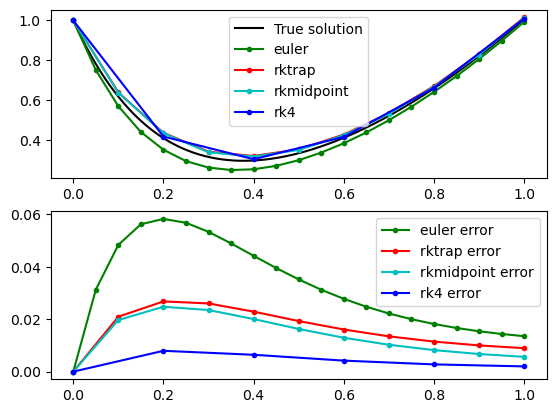

In [14]:
using PyPlot

N = 5

tt = range(a, b, length=100)

# Each method evaluates f(t,y) 4N times
tt1, yy1 = euler(f, a, b, y0, 4*N)
tt2, yy2 = rktrap(f, a, b, y0, 2*N)
tt3, yy3 = rkmidpoint(f, a, b, y0, 2*N)
tt4, yy4 = rk4(f, a, b, y0, N)
abserr1 = abs.(yy1 - ytrue(tt1))
abserr2 = abs.(yy2 - ytrue(tt2))
abserr3 = abs.(yy3 - ytrue(tt3))
abserr4 = abs.(yy4 - ytrue(tt4))

subplot(2, 1, 1)
plot(tt, ytrue(tt), "k", label="True solution")
plot(tt1, yy1, ".-g", label="euler")
plot(tt2, yy2, ".-r", label="rktrap")
plot(tt3, yy3, ".-c", label="rkmidpoint")
plot(tt4, yy4, ".-b", label="rk4")
legend(loc="best")

subplot(2, 1, 2)
plot(tt1, abserr1, ".-g", label="euler error")
plot(tt2, abserr2, ".-r", label="rktrap error")
plot(tt3, abserr3, ".-c", label="rkmidpoint error")
plot(tt4, abserr4, ".-b", label="rk4 error")
legend(loc="best");

---

## General implicit Runge-Kutta methods

Implicit methods are given by a Butcher tableau of the form:

$$
\begin{array}{c|c}
c & A \\
\hline
  & b^T \\
\end{array}
= 
\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & \cdots & a_{1s} \\
c_2 & a_{21} & a_{22} & \cdots & a_{2s} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
c_s & a_{s1} & a_{s2} & \cdots & a_{ss} \\
\hline
& b_1 & b_2 & \cdots & b_s
\end{array}
$$


The implicit method is then given by

$$ K_1 = f\paren{t_i + h c_1, y_i + h \paren{a_{11} K_1 + \cdots + a_{1s} K_{s}} } $$

$$ K_2 = f\paren{t_i + h c_2, y_i + h \paren{a_{21} K_1 + \cdots + a_{2s} K_{s}} } $$

$$ \vdots $$

$$ K_s = f\paren{t_i + h c_s, y_i + h \paren{a_{s1} K_1 + \cdots + a_{ss} K_{s}} }$$

$$ y_{i+1} = y_i + h \paren{b_1 K_1 + \cdots + b_s K_s} $$

where

$$c_j = \sum_{k=1}^{s} a_{jk}, \quad \sum_{k=1}^s b_k = 1.$$

---